<a href="https://colab.research.google.com/github/pariwesh93/PY600/blob/main/Missing_values_handling_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R

Downloading...
From: https://drive.google.com/uc?id=1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R
To: /content/hr.csv
100% 580k/580k [00:00<00:00, 8.80MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [ ]:
df.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,object
promotion_last_5years,int64
Department,object
salary,object


In [ ]:
df.shape

(15004, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


The info() shows, salary and age columns has null value(missing Value)

In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,29


<Axes: >

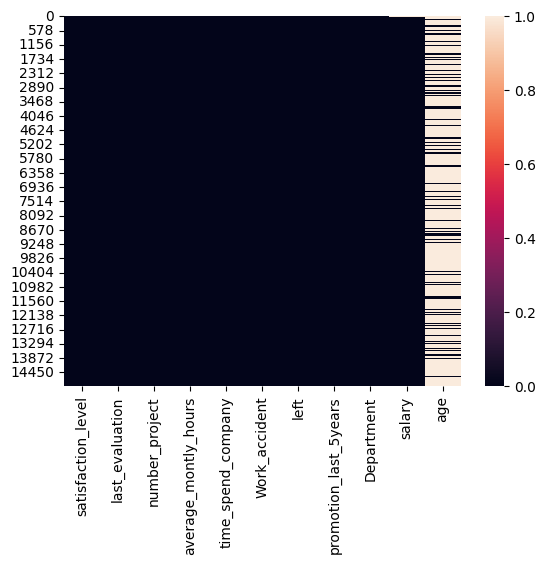

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age
count,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,3080.000000
mean,0.612871,0.716096,3.802919,201.044655,3.497934,0.144561,0.021261,27.018506
std,0.248628,0.171163,1.232550,49.937662,1.460012,0.351670,0.144258,1.429511
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,25.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,26.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,27.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,28.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,29.000000


In [ ]:
df.describe(include="object")

,left,Department,salary
count,15004,15004,14975
unique,3,10,3
top,0,sales,low
freq,11428,4140,7289


In [ ]:
df.left.value_counts()

,count
left,
0,11428
1,3572
?,4


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='left'>

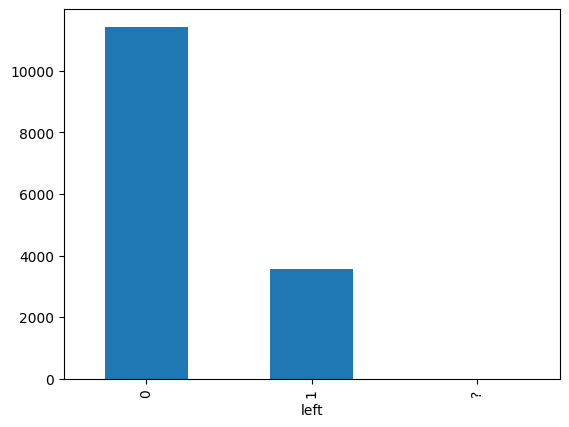

In [ ]:
df.left.value_counts().plot.bar()

Before managing the data.
The graph shows difference in target/lebel (left).

In [ ]:
df['Department'].unique()

array(['IT', 'hr', 'support', 'product_mng', 'sales', 'technical',
       'marketing', 'management', 'accounting', 'RandD'], dtype=object)

In [ ]:
df['Department'].value_counts()

,count
Department,
sales,4140
technical,2720
support,2230
IT,1228
product_mng,904
marketing,858
RandD,787
accounting,767
hr,739


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(le)

LabelEncoder()


In [ ]:

df["Department"]=le.fit_transform(df["Department"])


In [ ]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,0,low,NaN
1,0.40,0.49,2,155,3,0,1,0,3,medium,27.0


In [ ]:
df.fillna(value={"salary":df["salary"].mode()[0]}, inplace=True)

In [ ]:
df.drop(columns=["age"],inplace = True)

In [ ]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.24,0.79,2,175,5,0,0,0,0,low
1,0.40,0.49,2,155,3,0,1,0,3,medium


In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [ ]:
type(df.left[0])

str

In [ ]:
df['left']=pd.to_numeric(df['left'],errors='coerce')


In [ ]:
df['left']= df['left'].fillna(0)                               #df.fillna({'left':0}).head()

In [ ]:
df['left']=df['left'].astype(int)

In [ ]:
df.left.dtypes

dtype('int64')

In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


<Axes: xlabel='left'>

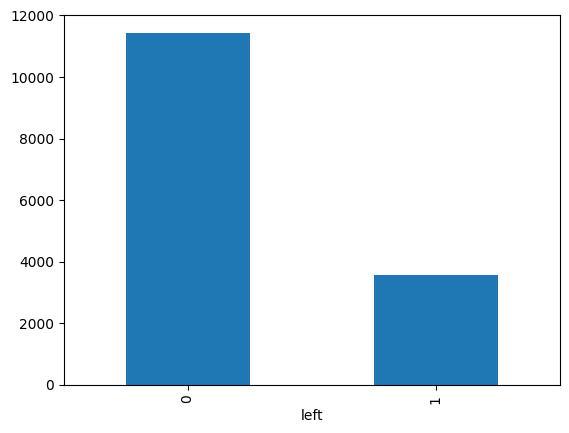

In [ ]:
df.left.value_counts().plot.bar()

After balancing the data, the graph shows clear picture of Target. here, tatget level is imblanced.

<Axes: >

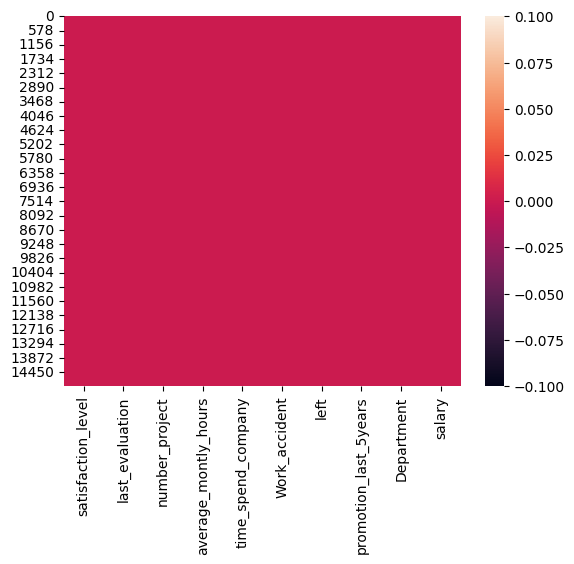

In [ ]:
sns.heatmap(df.isnull())

Now, the heatmap (above Graph) shows, there is no null value in the dataset.

In [ ]:
import seaborn as sns

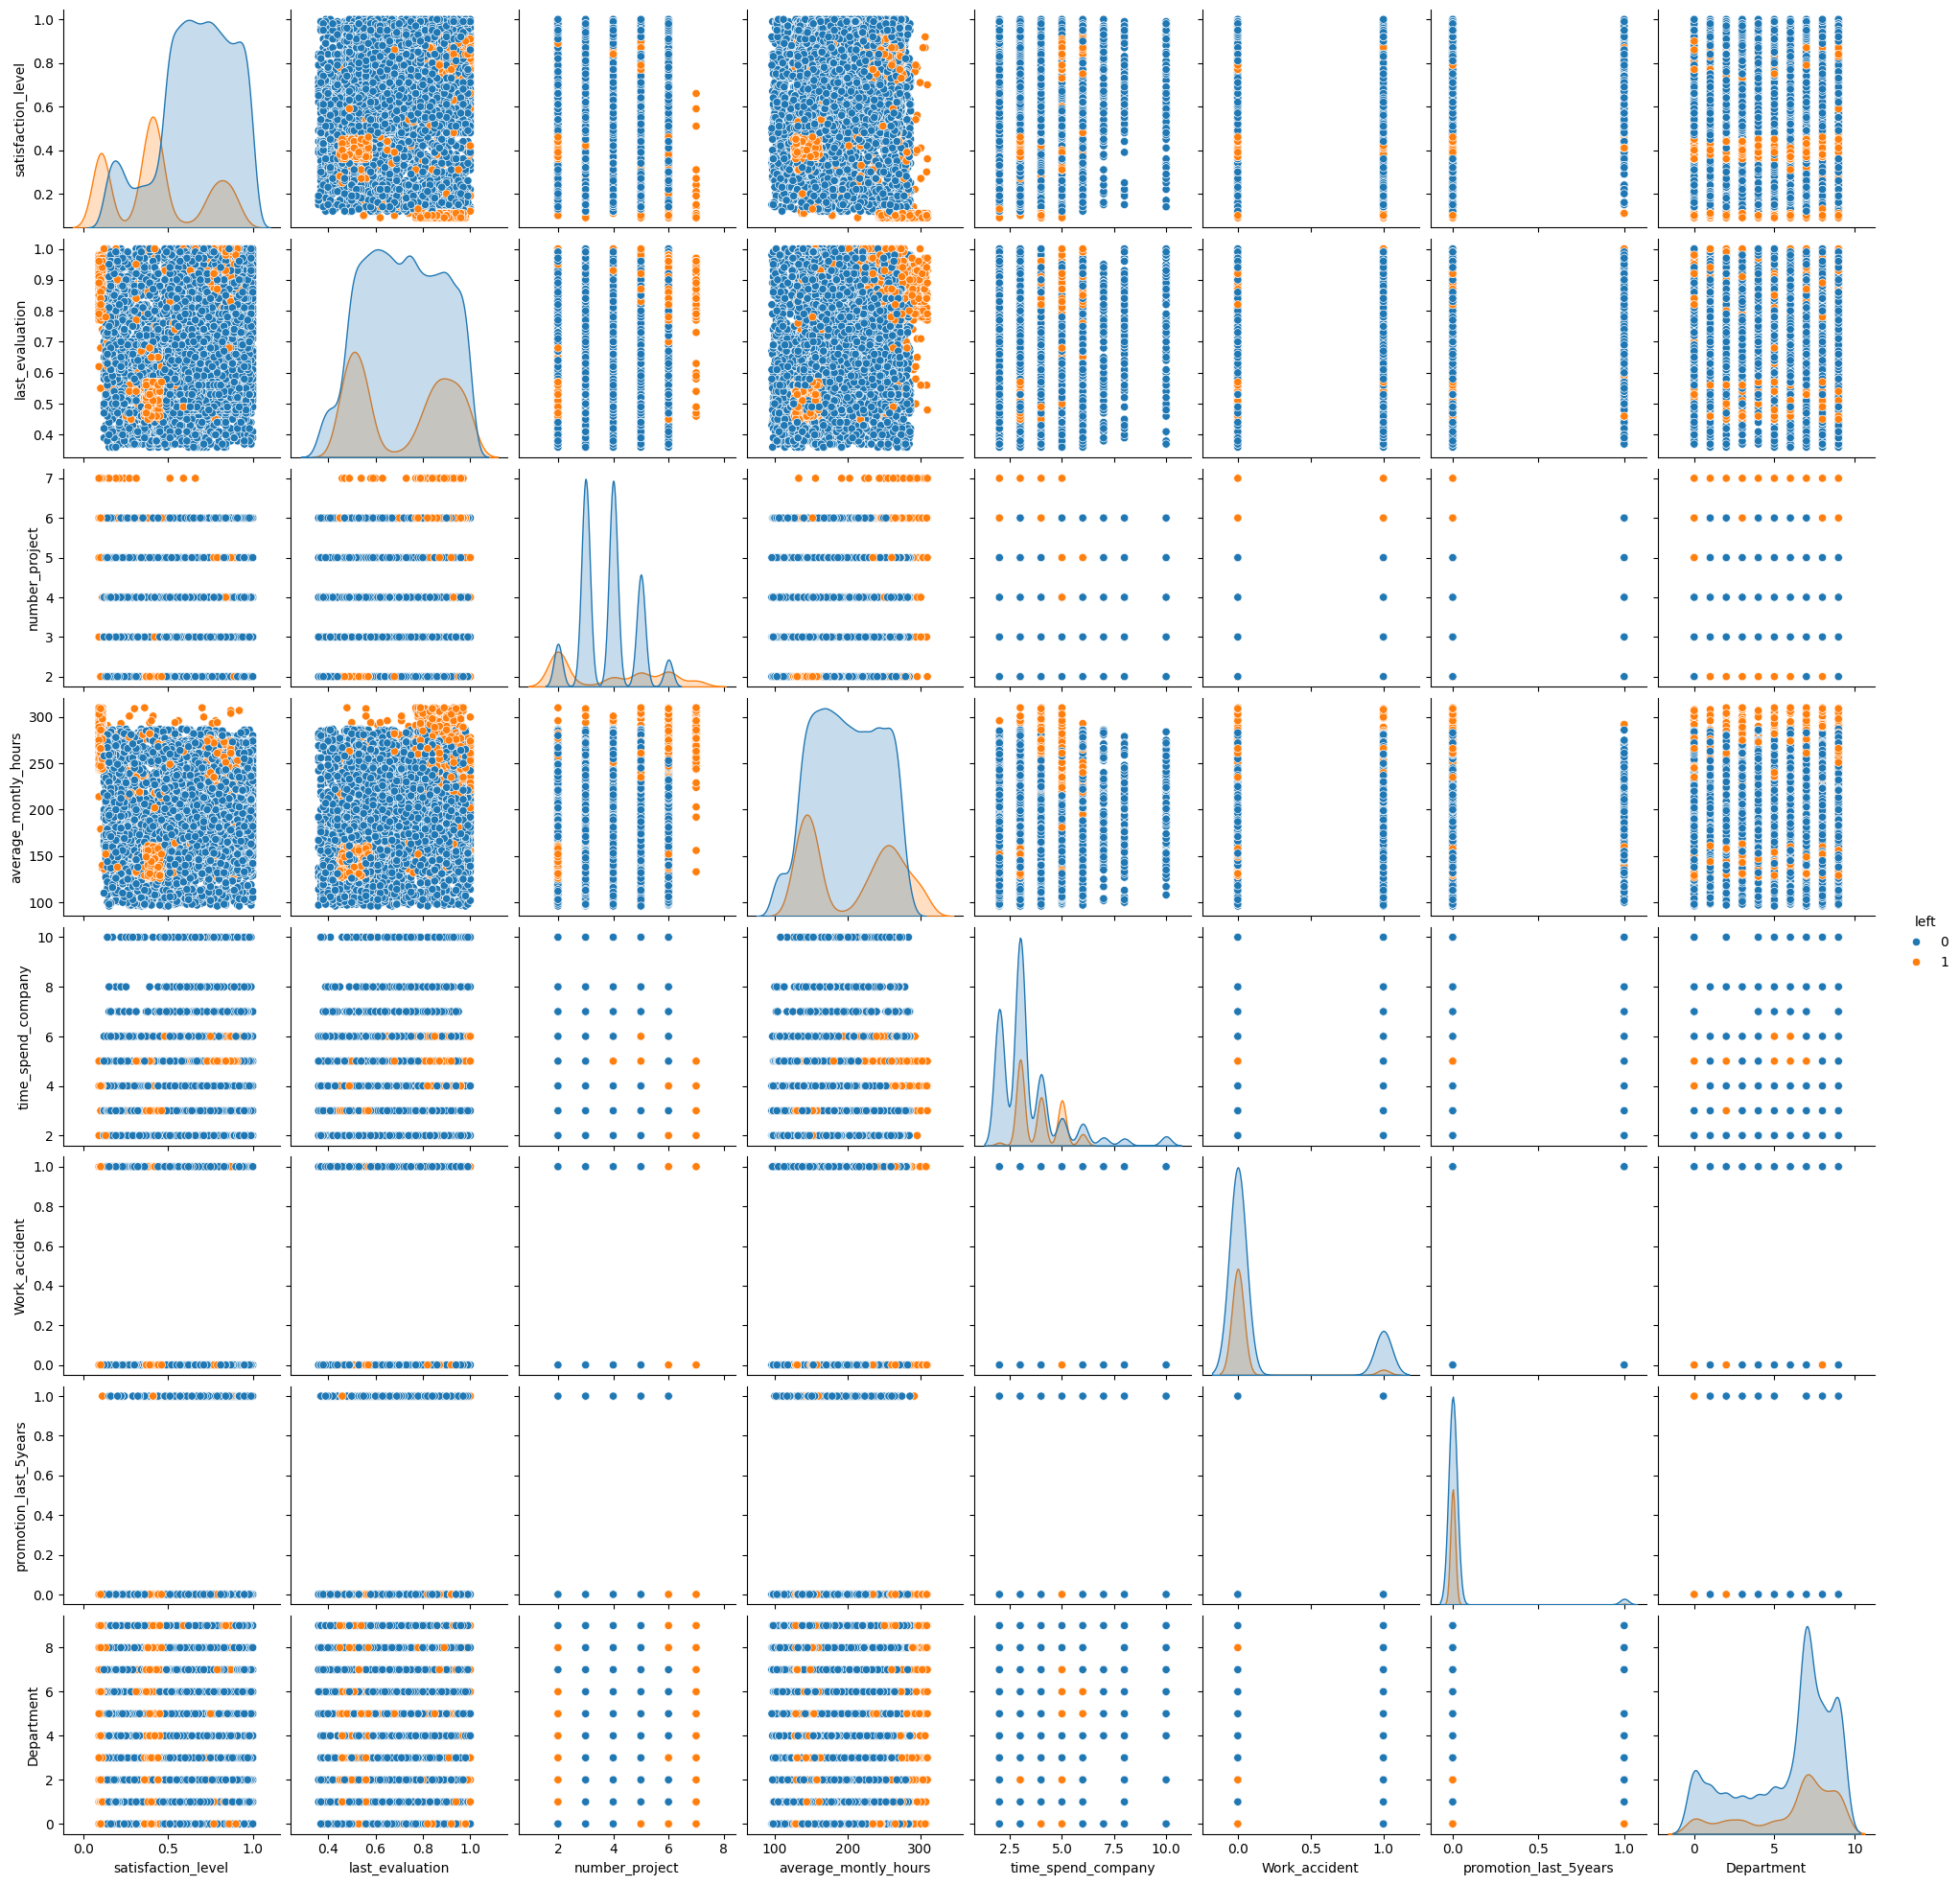

In [ ]:
sns.pairplot(df,hue="left")

# Feature Selection

In [ ]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.24,0.79,2,175,5,0,0,0,0,low
1,0.40,0.49,2,155,3,0,1,0,3,medium


In [ ]:
X= df[["promotion_last_5years","number_project","Work_accident","time_spend_company"]]
y=df.left

In [ ]:
X.head()

,promotion_last_5years,number_project,Work_accident,time_spend_company
0,0,2,0,5
1,0,2,0,3
2,0,2,1,3
3,0,6,0,4
4,0,5,1,4


In [ ]:
# X = df.drop(['left'], axis=1)
# y = df['left']

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head(2)

,promotion_last_5years,number_project,Work_accident,time_spend_company
0,0,2,0,5
1,0,2,0,3


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model=make_pipeline(StandardScaler(),LogisticRegression ())

model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Evaluation

In [ ]:
accuracy = model.score(X_test,y_test)
accuracy

0.7387537487504166

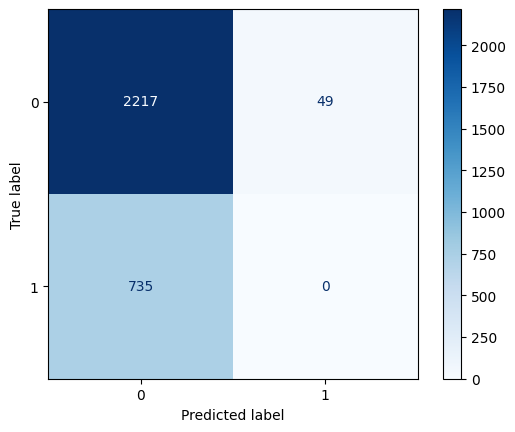

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap="Blues")

### Precision , Recall and f1 score

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true=y_test, y_pred=y_pred,)

0.0

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true=y_test, y_pred=y_pred,)

0.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true=y_test, y_pred=y_pred,)

0.0

# svm

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model=make_pipeline(StandardScaler(), SVC (kernel="linear"))

model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Accuracy SVM

In [ ]:
accuracy = model.score(X_test,y_test)
accuracy

0.7550816394535155

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model=make_pipeline(StandardScaler(), SVC (kernel="rbf"))

model

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = model.score(X_test,y_test)
accuracy

0.9133622125958014

#### Comparision of DecisionTree, KNeighbors, LogisticRegression and SVC


DecisionTreeClassifier() accuracy =  0.9236921026324558
DecisionTreeClassifier() precision =  0.8227040816326531
DecisionTreeClassifier() recall =  0.8775510204081632
DecisionTreeClassifier() f1 =  0.8492429229756419


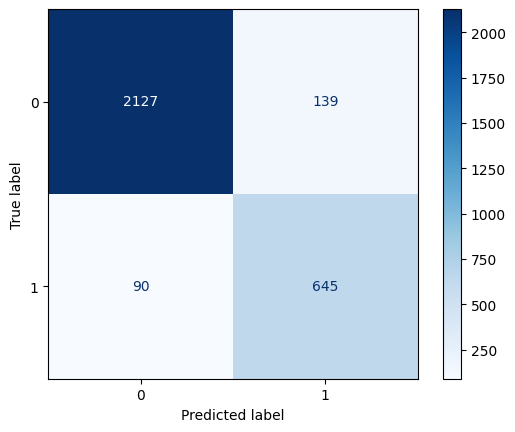

KNeighborsClassifier() accuracy =  0.9186937687437521
KNeighborsClassifier() precision =  0.7975757575757576
KNeighborsClassifier() recall =  0.8952380952380953
KNeighborsClassifier() f1 =  0.8435897435897436


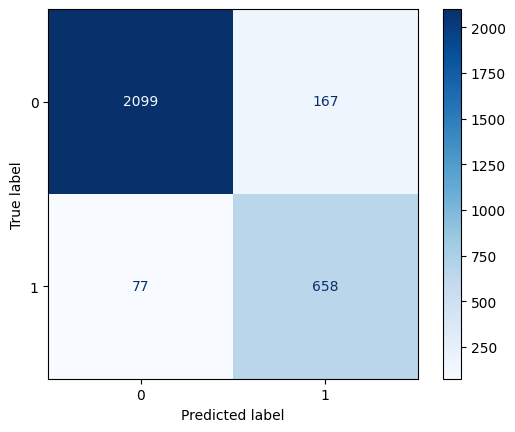

LogisticRegression() accuracy =  0.7387537487504166
LogisticRegression() precision =  0.0
LogisticRegression() recall =  0.0
LogisticRegression() f1 =  0.0


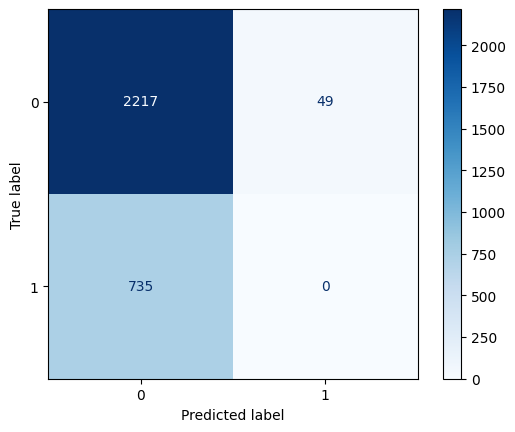

SVC() accuracy =  0.9133622125958014
SVC() precision =  0.7858002406738869
SVC() recall =  0.8884353741496599
SVC() f1 =  0.8339719029374203


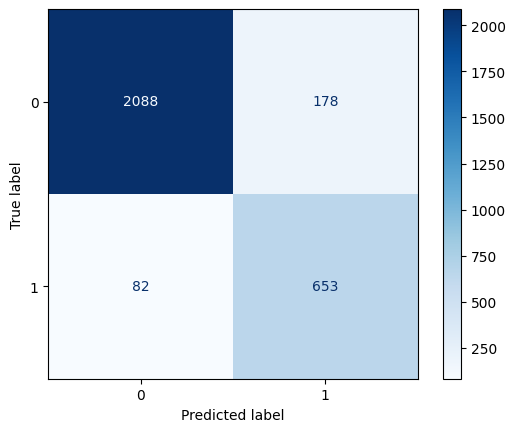

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


models = [DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression(), SVC()]


for algorithm in models:
    model = make_pipeline(StandardScaler(), algorithm)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_true=y_test, y_pred=y_pred)
    recall = recall_score(y_true=y_test, y_pred=y_pred)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(f"{algorithm} accuracy = ", accuracy)
    print(f"{algorithm} precision = ", precision)
    print(f"{algorithm} recall = ", recall)
    print(f"{algorithm} f1 = ", f1)
    fig = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.show()

In the confusion matrix above, the accuracy rates are as follows: SVC() accuracy =91%, LogisticRegression() accuracy =74%, KNeighborsClassifier() accuracy = 91%, DecisionTreeClassifier() accuracy = 92%. Based on this result, DecisionTreeClassifier appears to be the most suitable model for this problem.

* In the confusion matrix above, the accuracy rates are  as follows: SVC() accuracy =91%, LogisticRegression() accuracy =74%, KNeighborsClassifier() accuracy = 91%, DecisionTreeClassifier() accuracy = 92%. Based on this result, DecisionTreeClassifier appears to be the most suitable model for this problem.